In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from src.data_loader import load_and_preprocess_mnist
from src.visualization import plot_digits, plot_single_digit

# Set random seed for reproducibility
np.random.seed(42)

## 1. Load the Dataset

Load a subset of the data for faster experimentation. The data loader:
- Normalizes pixel values to [0, 1]
- Optionally binarizes the images (threshold at 0.5)
- Flattens 28×28 images into 784-dimensional vectors

In [2]:
# Load 5000 training samples and full test set
X_train, y_train, X_test, y_test = load_and_preprocess_mnist(
    n_samples=5000,
    binarize=False,  # Keep grayscale for visualization
    flatten=True
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Value range: [{X_train.min():.2f}, {X_train.max():.2f}]")
print(f"\nLabel distribution (training):")
unique, counts = np.unique(y_train, return_counts=True)
for digit, count in zip(unique, counts):
    print(f"  Digit {digit}: {count} samples ({count/len(y_train)*100:.1f}%)")

Training set shape: (5000, 784)
Test set shape: (10000, 784)
Value range: [0.00, 1.00]

Label distribution (training):
  Digit 0: 479 samples (9.6%)
  Digit 1: 563 samples (11.3%)
  Digit 2: 488 samples (9.8%)
  Digit 3: 493 samples (9.9%)
  Digit 4: 535 samples (10.7%)
  Digit 5: 434 samples (8.7%)
  Digit 6: 501 samples (10.0%)
  Digit 7: 550 samples (11.0%)
  Digit 8: 462 samples (9.2%)
  Digit 9: 495 samples (9.9%)


## 2. Visualize Sample Digits

Some example digits from each class to understand what we're working with.

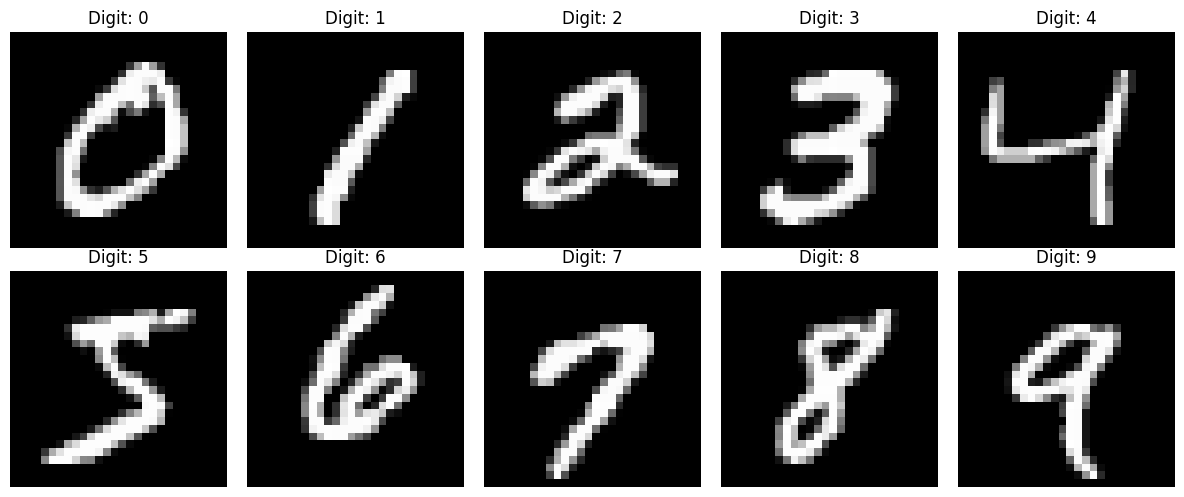

Sample digits from each class (0-9)


In [3]:
# Show one example from each digit class
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for digit in range(10):
    # Find first occurrence of this digit
    idx = np.where(y_train == digit)[0][0]
    
    # Display the image
    axes[digit].imshow(X_train[idx].reshape(28, 28), cmap='gray')
    axes[digit].set_title(f'Digit: {digit}')
    axes[digit].axis('off')

plt.tight_layout()
plt.savefig('../results/sample_digits.png', dpi=150, bbox_inches='tight')
plt.show()

print("Sample digits from each class (0-9)")

## 3. Analyze Variability Within Classes

Different people write digits differently. Let's see the variability within a single digit class.

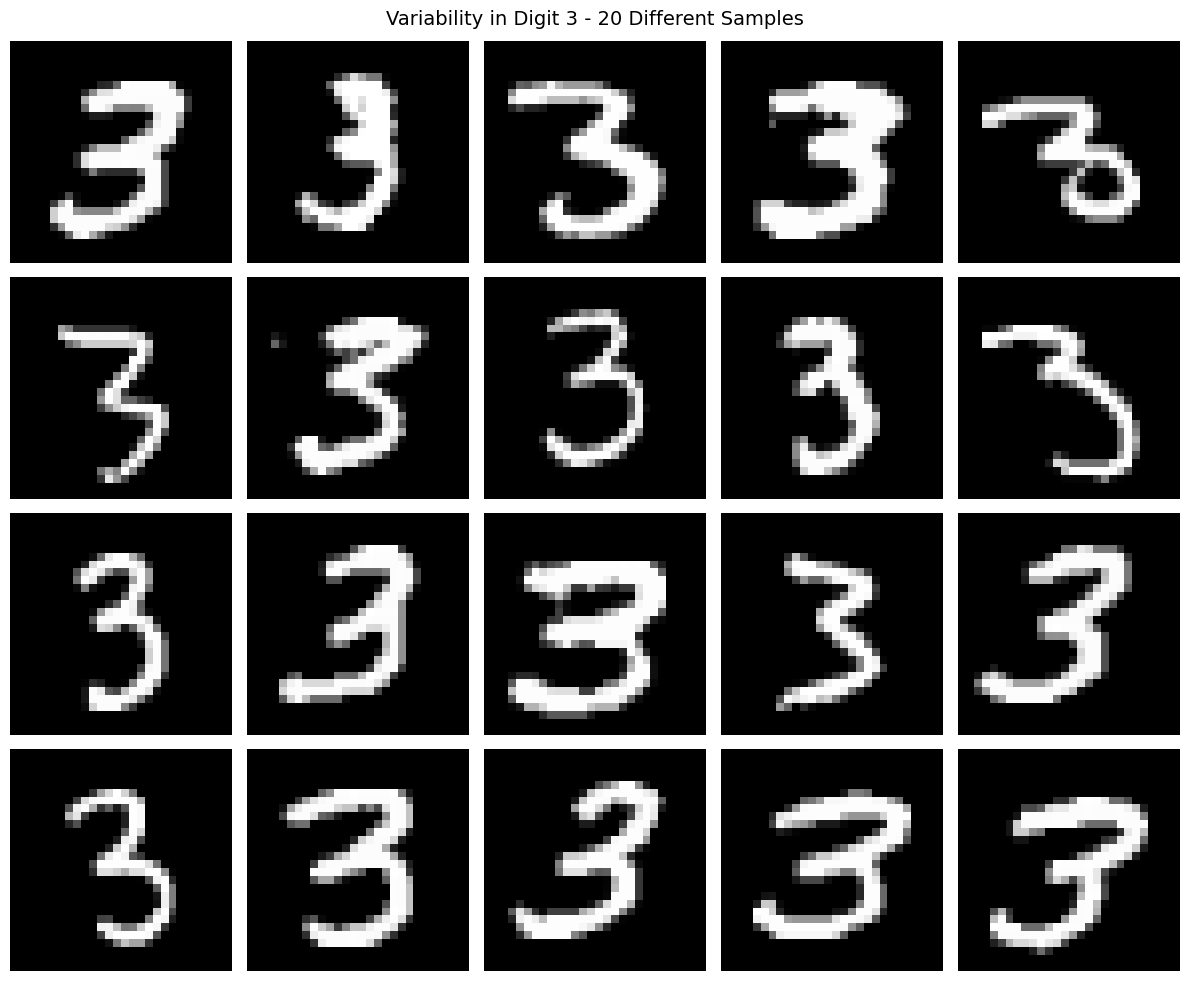

These are all labeled as '3' but show significant variation in style


In [4]:
# Show multiple examples of the same digit (e.g., digit 3)
digit_to_show = 3
indices = np.where(y_train == digit_to_show)[0][:20]

fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.flatten()

for i, idx in enumerate(indices):
    axes[i].imshow(X_train[idx].reshape(28, 28), cmap='gray')
    axes[i].axis('off')

plt.suptitle(f'Variability in Digit {digit_to_show} - 20 Different Samples', fontsize=14)
plt.tight_layout()
plt.savefig('../results/digit_variability.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"These are all labeled as '{digit_to_show}' but show significant variation in style")

## 4. Data Statistics

Let's examine some statistical properties of the pixel data.

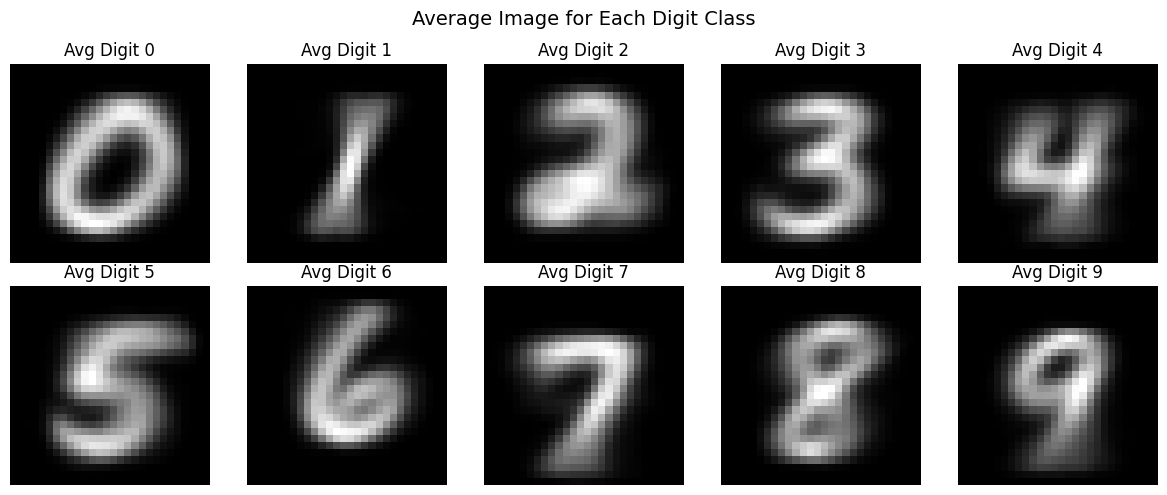

These averaged images show the 'typical' appearance of each digit


In [5]:
# Calculate average image across all training samples
mean_image = X_train.mean(axis=0)

# Calculate average image per digit
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for digit in range(10):
    digit_samples = X_train[y_train == digit]
    avg_digit = digit_samples.mean(axis=0)
    
    axes[digit].imshow(avg_digit.reshape(28, 28), cmap='gray')
    axes[digit].set_title(f'Avg Digit {digit}')
    axes[digit].axis('off')

plt.suptitle('Average Image for Each Digit Class', fontsize=14)
plt.tight_layout()
plt.savefig('../results/average_digits.png', dpi=150, bbox_inches='tight')
plt.show()

print("These averaged images show the 'typical' appearance of each digit")

## 5. Prepare Binarized Data for Bernoulli Mixture

For the Bernoulli mixture model, we need binary (0/1) data.

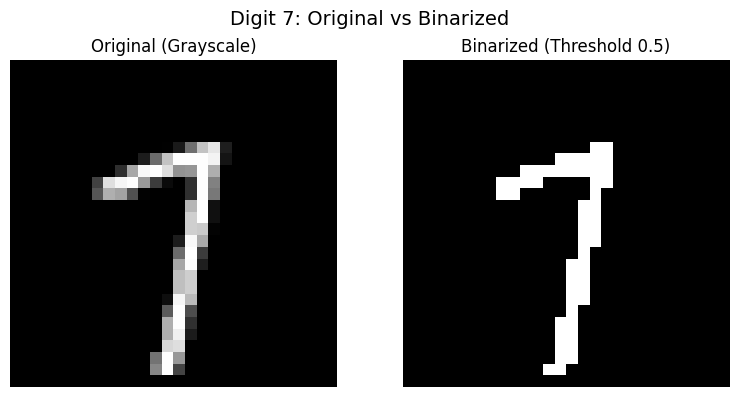

Binarized data: [0. 1.] (only 0s and 1s)


In [6]:
# Load binarized version
X_train_bin, y_train_bin, X_test_bin, y_test_bin = load_and_preprocess_mnist(
    n_samples=5000,
    binarize=True,
    flatten=True
)

# Compare original vs binarized
sample_idx = 42
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(X_train[sample_idx].reshape(28, 28), cmap='gray')
axes[0].set_title('Original (Grayscale)')
axes[0].axis('off')

axes[1].imshow(X_train_bin[sample_idx].reshape(28, 28), cmap='gray')
axes[1].set_title('Binarized (Threshold 0.5)')
axes[1].axis('off')

plt.suptitle(f'Digit {y_train[sample_idx]}: Original vs Binarized', fontsize=14)
plt.tight_layout()
plt.savefig('../results/binarization_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Binarized data: {np.unique(X_train_bin)} (only 0s and 1s)")

## Summary

The MNIST dataset was explored and prepared for clustering:

1. **Dataset size**: 5,000 training samples, 10,000 test samples
2. **Feature dimension**: 784 (28×28 flattened)
3. **Classes**: 10 digits (0-9) with roughly balanced distribution
4. **Variability**: Significant within-class variation in handwriting styles
5. **Data formats**: 
   - Grayscale (0-1) for K-means
   - Binary (0/1) for Bernoulli mixture